<a href="https://colab.research.google.com/github/megha-66/Deep-Learning-Lab-works-/blob/main/CV_Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import cv2
# Load and preprocess the image
image_path = r'/content/Screenshot 2024-06-16 022632.png'
image = cv2.imread(image_path)
image = cv2.resize(image, (512, 512))  # Resize to model input size
image = image / 255.0  # Normalize
image = np.expand_dims(image, axis=0)  # Add batch dimension

In [ ]:
model = tf.keras.applications.DenseNet201(include_top = False, weights = 'imagenet')


In [ ]:
predicted_mask = model.predict(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


In [ ]:
predicted_mask = tf.image.resize(predicted_mask, (image.shape[1], image.shape[2]))
predicted_mask = tf.argmax(predicted_mask, axis=-1)
predicted_mask = predicted_mask[..., tf.newaxis]
predicted_mask = tf.squeeze(predicted_mask, axis=0)

In [ ]:
from google.colab.patches import cv2_imshow

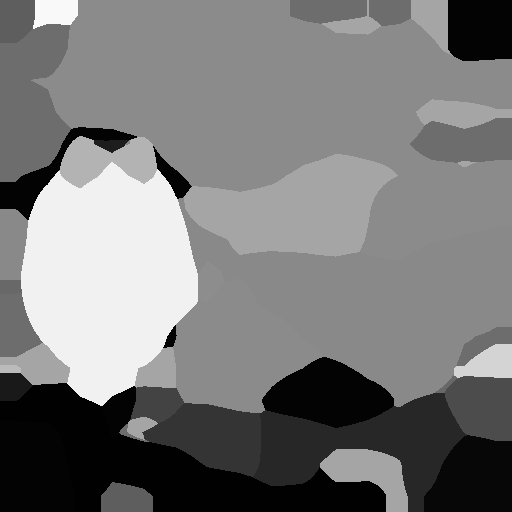

In [ ]:
cv2_imshow(np.uint8(predicted_mask))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
(ds_train,ds_test), ds_info = tfds.load(
    'oxford_iiit_pet',
    split = ['train','test'],
    shuffle_files = True,
    with_info = True
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

In [7]:
def preprocess(sample):
  image = sample['image']
  label = sample['segmentation_mask']
  image = tf.image.resize(image,(128,128))
  label = tf.image.resize(label, (128,128))
  label = tf.cast(label>0, tf.float32)
  return image/255.0, label

In [8]:
ds_train = ds_train.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)

In [15]:
#Simple U-Net model
def unet_model(input_size = (128,128,3)):
  inputs = tf.keras.layers.Input(input_size)

  #Down-sampling
  c1 = tf.keras.layers.Conv2D(64,(3,3), activation = 'relu', padding = 'same')(inputs)
  c1 = tf.keras.layers.Conv2D(64,(3,3), activation = 'relu', padding = 'same')(c1)
  p1 = tf.keras.layers.MaxPooling2D((2,2))(c1)

  c2 = tf.keras.layers.Conv2D(128,(3,3), activation = 'relu', padding = 'same')(p1)
  c2 = tf.keras.layers.Conv2D(128,(3,3), activation = 'relu', padding = 'same')(c2)
  p2 = tf.keras.layers.MaxPooling2D((2,2))(c2)

  #Bottleneck
  c3 = tf.keras.layers.Conv2D(256,(3,3), activation = 'relu', padding = 'same')(p2)
  c3 = tf.keras.layers.Conv2D(256,(3,3), activation = 'relu', padding = 'same')(c3)

  #Upsampling
  u4 = tf.keras.layers.UpSampling2D((2,2))(c3)
  u4 = tf.keras.layers.concatenate([u4,c2])
  c4 = tf.keras.layers.Conv2D(128,(3,3), activation = 'relu', padding = 'same')(u4)
  c4 = tf.keras.layers.Conv2D(128,(3,3), activation = 'relu', padding = 'same')(c4)

  u5 = tf.keras.layers.UpSampling2D((2,2))(c4)
  u5 = tf.keras.layers.concatenate([u5,c1])
  c5 = tf.keras.layers.Conv2D(64,(3,3), activation = 'relu', padding = 'same')(u5)
  c5 = tf.keras.layers.Conv2D(64,(3,3), activation = 'relu', padding = 'same')(c5)

  outputs = tf.keras.layers.Conv2D(1,(1,1), activation = 'sigmoid', padding = 'same')(c5)

  model = tf.keras.Model(inputs,outputs)
  return model


In [16]:
model = unet_model()
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [19]:
model.fit(ds_train, validation_data=ds_test, epochs = 10)

Epoch 1/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 40s 348ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 47s 410ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 73s 328ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 38s 335ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 47s 410ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 73s 331ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 38s 335ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
115/115 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


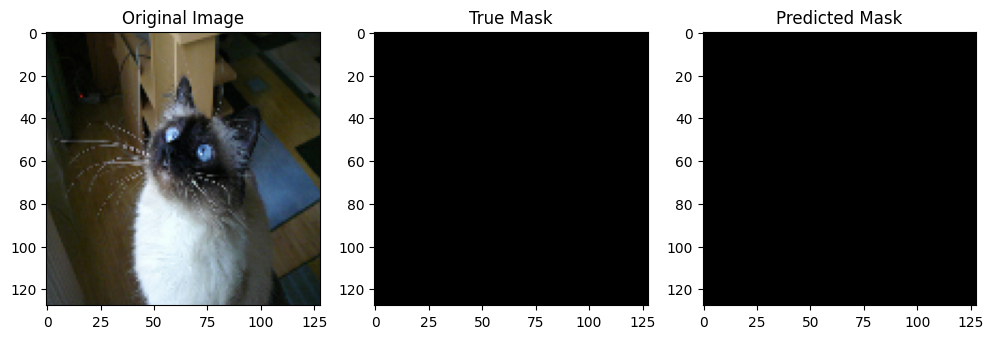

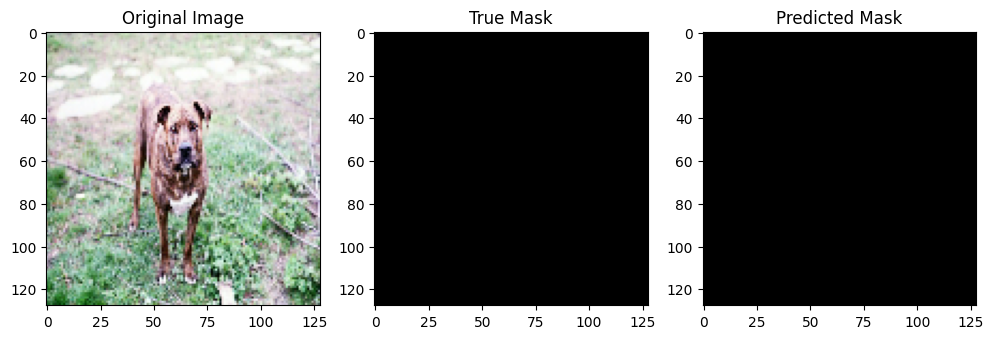

In [22]:
import matplotlib.pyplot as plt
for images, true_masks in ds_test.take(1):
  predicted_masks = model.predict(images)

for i in range(2):
  plt.figure(figsize = (12,4))
  plt.subplot(1,3,1)
  plt.title("Original Image")
  plt.imshow(images[i])

  plt.subplot(1,3,2)
  plt.title("True Mask")
  plt.imshow(tf.squeeze(true_masks[i]), cmap = 'gray')

  plt.subplot(1,3,3)
  plt.title("Predicted Mask")
  plt.imshow(tf.squeeze(predicted_masks[i] > 0.5), cmap = 'gray')

  plt.show()